In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
from matplotlib import pyplot as pt

In [4]:
df=pd.read_csv('Titanic-Dataset.csv')

In [5]:
df.shape

(891, 12)

In [6]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
df.isnull().value_counts()

PassengerId  Survived  Pclass  Name   Sex    Age    SibSp  Parch  Ticket  Fare   Cabin  Embarked
False        False     False   False  False  False  False  False  False   False  True   False       529
                                                                                 False  False       183
                                             True   False  False  False   False  True   False       158
                                                                                 False  False        19
                                             False  False  False  False   False  False  True          2
dtype: int64

In [8]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [10]:
df['PassengerId']

0        1
1        2
2        3
3        4
4        5
      ... 
886    887
887    888
888    889
889    890
890    891
Name: PassengerId, Length: 891, dtype: int64

In [11]:
s=df['Survived'].value_counts()

In [12]:
s

0    549
1    342
Name: Survived, dtype: int64

In [13]:
s.keys()

Int64Index([0, 1], dtype='int64')

In [14]:
k=s.keys()
k

Int64Index([0, 1], dtype='int64')

In [15]:
import seaborn as sns

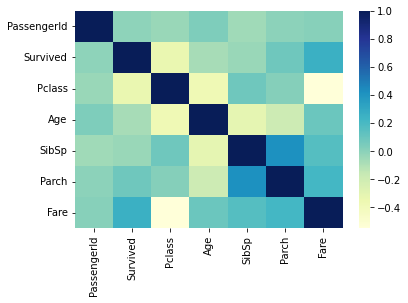

In [16]:
sns.heatmap(df.corr(), cmap='YlGnBu')
pt.show()

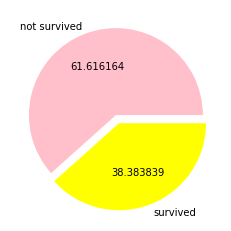

In [17]:
v=[]
for i in s:
    v.append(i)

labels='not survived', 'survived'
explode=(0,0.1)
pt.pie(v, explode=explode, colors=['pink','yellow'], labels=labels, autopct='%f')
pt.show()


In [18]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [19]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer

class Ageimputer(BaseEstimator, TransformerMixin):
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        imputer=SimpleImputer(strategy="mean")
        X["Age"]=imputer.fit_transform(X[["Age"]])
        return X

In [20]:
ndf=df.dropna()

In [21]:
ndf.shape

(183, 12)

In [22]:
x=ndf.drop(['Name','PassengerId','Survived','Sex','Ticket'],axis=1)

In [23]:
y=ndf['Survived']

In [24]:
from sklearn import preprocessing
cab=preprocessing.LabelEncoder()
emb=preprocessing.LabelEncoder()


In [25]:
y

1      1
3      1
6      0
10     1
11     1
      ..
871    1
872    0
879    1
887    1
889    1
Name: Survived, Length: 183, dtype: int64

In [26]:
x['Cabin']=cab.fit_transform(x['Cabin'])
x['Embarked']=emb.fit_transform(x['Embarked'])

In [27]:
x

,Pclass,Age,SibSp,Parch,Fare,Cabin,Embarked
1,1,38.0,1,0,71.2833,72,0
3,1,35.0,1,0,53.1000,48,2
6,1,54.0,0,0,51.8625,117,2
10,3,4.0,1,1,16.7000,131,2
11,1,58.0,0,0,26.5500,43,2
...,...,...,...,...,...,...,...
871,1,47.0,1,1,52.5542,91,2
872,1,33.0,0,0,5.0000,29,2
879,1,56.0,0,1,83.1583,61,0
887,1,19.0,0,0,30.0000,25,2


In [28]:
from sklearn import linear_model
model=linear_model.LogisticRegression()

In [29]:
model.fit(x,y)

LogisticRegression()

In [30]:
model.score(x,y)

0.7213114754098361

In [31]:
model.predict(x)

array([1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [64]:
from sklearn import model_selection
train_x,test_x,train_y,test_y=model_selection.train_test_split(x,y)

In [65]:
len(train_x),len(train_y)

(137, 137)

In [66]:
len(test_x),len(test_y)

(46, 46)

In [67]:
from sklearn import linear_model
model=linear_model.LogisticRegression()
model.fit(train_x,train_y)
model.score(test_x,test_y)

0.8043478260869565

In [80]:
train_x.to_csv('train_x2_titanic.csv')
train_y.to_csv('train_y2_2titanic.csv')
test_x.to_csv('test_x2_titanic.csv')
test_y.to_csv('test_y2_titanic.csv')

In [88]:
model.predict(test_x)

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int64)

In [89]:
train_y

741    0
835    1
621    1
872    0
853    1
      ..
430    1
52     1
205    0
823    1
92     0
Name: Survived, Length: 137, dtype: int64

In [90]:
import pickle

In [91]:
with open('Titanic_death_prediction _model','wb') as file:
    pickle.dump(model,file)

In [92]:
with open('Titanic_death_prediction _model','rb') as file:
    m100=pickle.load(file)

In [93]:
m100.score(x,y)

0.7103825136612022

In [94]:
predictions=m100.predict(x)

In [95]:
predictions

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [97]:
final_df=pd.DataFrame(ndf['PassengerId'])
final_df['Survived']=predictions
final_df.to_csv("prediction.csv", index=False)